In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'is_Winter', 'is_Spring', 'is_Summer',
       'is_Autumn', 'is_Holiday', 'is_Functioning_day', 'Month', 'Day',
       'int_date'],
      dtype='object')

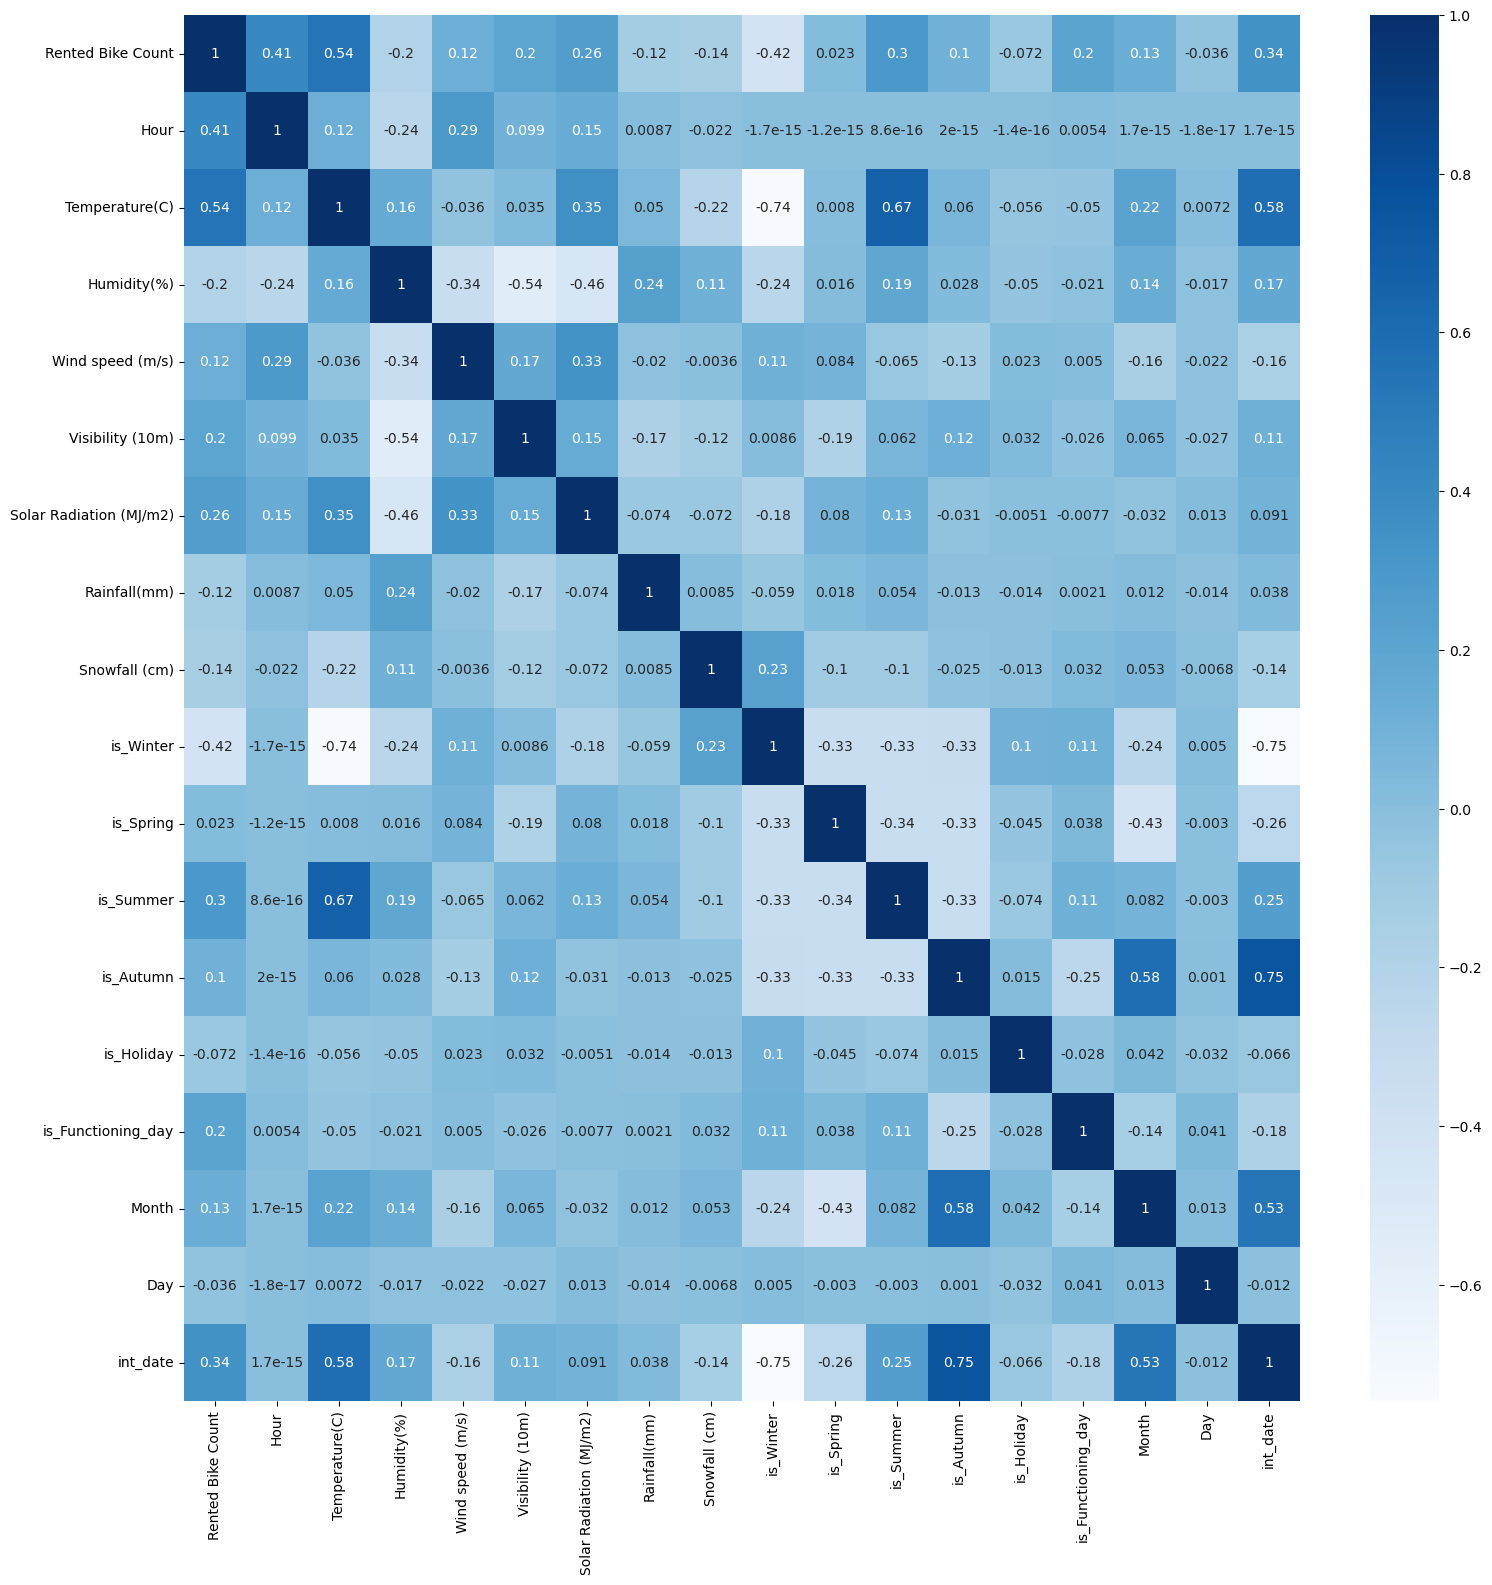

In [5]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(18,18)) 
corr_matrix = df.corr()
ax=sb.heatmap(corr_matrix, cmap="Blues", annot=True)

In [6]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [7]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [8]:
#splitting data into train,validation and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 17)
(7008, 1)
(876, 17)
(876, 1)
(876, 17)
(876, 1)


(None, None)

# Best model from part-2

In [9]:
from sklearn.ensemble import RandomForestRegressor
best_model_2 = RandomForestRegressor(n_estimators= 300, max_features= 'log2', max_depth= 22,bootstrap=True)
best_model_2.fit(X_train,y_train)

RandomForestRegressor(max_depth=22, max_features='log2', n_estimators=300)

In [10]:
#Error on the test dataset
y_test_pred = best_model_2.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.002560162361967111
The mean absolute error is 0.031446399560512414
The root mean sqaured error is 0.05059804701732184


R^2 is 0.9149781540827759
RMSE is: 0.05059804701732184


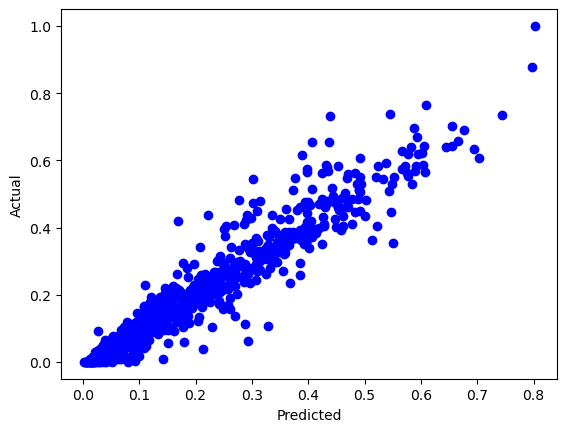

In [11]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {best_model_2.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

# variable selection using KNN

# K=5

In [12]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor()


param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}


features = SelectKBest(mutual_info_regression,k=5)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(features.fit_transform(X_train, y_train), y_train)
best_params = grid.best_params_


knn = KNeighborsRegressor(**best_params)


k_best = features.fit_transform(X_train, y_train)
knn.fit(k_best, y_train)

y_pred = knn.predict(features.transform(X_test))


print(X.columns[features.get_support()])
features_knn=X[X.columns[features.get_support()]]
features_knn.head(2)


Index(['Hour', 'Temperature(C)', 'is_Winter', 'Month', 'int_date'], dtype='object')


,Hour,Temperature(C),is_Winter,Month,int_date
0,0,-5.2,True,12.0,43068.0
1,1,-5.5,True,12.0,43068.0


In [13]:
df_1=df[['Hour', 'Temperature(C)', 'is_Winter', 'Month', 'int_date','Rented Bike Count']]

In [14]:
df_1.head()

,Hour,Temperature(C),is_Winter,Month,int_date,Rented Bike Count
0,0,-5.2,True,12.0,43068.0,254
1,1,-5.5,True,12.0,43068.0,204
2,2,-6.0,True,12.0,43068.0,173
3,3,-6.2,True,12.0,43068.0,107
4,4,-6.0,True,12.0,43068.0,78


In [15]:
X = df_1.drop('Rented Bike Count',axis=1)
y = df_1['Rented Bike Count']

In [16]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [17]:
#splitting data into train,validation and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 5)
(7008, 1)
(876, 5)
(876, 1)
(876, 5)
(876, 1)


(None, None)

# PART-2 BEST MODEL - RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestRegressor
best_model_feature5_2 = RandomForestRegressor(n_estimators= 300, max_features= 'log2', max_depth= 22,bootstrap=True)
best_model_feature5_2.fit(X_train,y_train)

RandomForestRegressor(max_depth=22, max_features='log2', n_estimators=300)

In [19]:
y_test_pred = best_model_feature5_2.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)
best_model_feature5_2.score(X_test, y_test)

MSE: 0.006839829625491126


0.7728523201662312

In [21]:
#Error on the validation set
#model evaluation on validation dataset
y_valid_pred = best_model_feature5_2.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.008492127541745588
The mean absolute error is 0.05344815914672307
The root mean sqaured error is 0.09215274028343155


In [22]:
#Error on the test dataset
y_test_pred = best_model_feature5_2.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.006839829625491126
The mean absolute error is 0.04899072134961118
The root mean sqaured error is 0.08270326248396206


R^2 is 0.7728523201662312
RMSE is: 0.08270326248396206


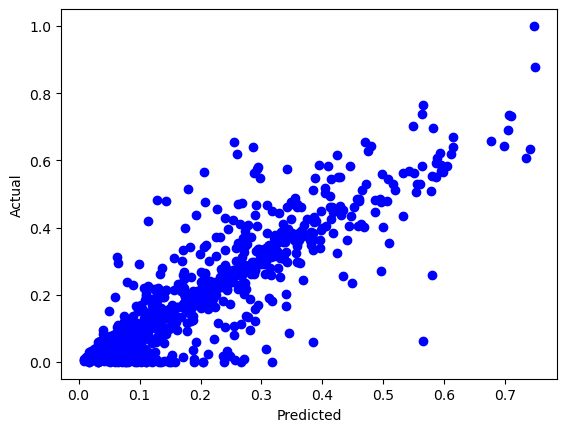

In [23]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {best_model_feature5_2.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

# PART-3 BEST MODEL - DEEP LEARNING

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y, test_size = 0.2, random_state = 1111)

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# We decalred a function for creating a model.
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
def build_model3_five_hidden_layers():
    
    model = Sequential()

    model.add(Dense(128, input_shape = (X_train.shape[1],)))    
    
    model.add(Dense(128,Activation('relu')))                         
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         

    
    model.add(Dense(1))                        
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) 
    
    return model

model3 = build_model3_five_hidden_layers()

history = model3.fit(X_train, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.0216 - mae: 0.1025 - mse: 0.0216 - val_loss: 0.0167 - val_mae: 0.0886 - val_mse: 0.0167
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0182 - mae: 0.0917 - mse: 0.0182 - val_loss: 0.0150 - val_mae: 0.0863 - val_mse: 0.0150
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0177 - mae: 0.0892 - mse: 0.0177 - val_loss: 0.0189 - val_mae: 0.0989 - val_mse: 0.0189
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0166 - mae: 0.0853 - mse: 0.0166 - val_loss: 0.0156 - val_mae: 0.0851 - val_mse: 0.0156
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0158 - mae: 0.0824 - mse: 0.0158 - val_loss: 0.0146 - val_mae: 0.0821 - val_mse: 0.0146
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0154 - mae: 0.0813 - mse: 0.0154 - val_loss: 0.0164 - val_mae: 0.0882 - val_mse: 0.0164
Epoch 7/10

176/176 [==============================] - 0s 1ms/step - loss: 0.0117 - mae: 0.0682 - mse: 0.0117 - val_loss: 0.0099 - val_mae: 0.0629 - val_mse: 0.0099
Epoch 51/100
176/176 [==============================] - 0s 987us/step - loss: 0.0116 - mae: 0.0677 - mse: 0.0116 - val_loss: 0.0106 - val_mae: 0.0642 - val_mse: 0.0106
Epoch 52/100
176/176 [==============================] - 0s 989us/step - loss: 0.0116 - mae: 0.0680 - mse: 0.0116 - val_loss: 0.0137 - val_mae: 0.0697 - val_mse: 0.0137
Epoch 53/100
176/176 [==============================] - 0s 982us/step - loss: 0.0115 - mae: 0.0677 - mse: 0.0115 - val_loss: 0.0120 - val_mae: 0.0701 - val_mse: 0.0120
Epoch 54/100
176/176 [==============================] - 0s 984us/step - loss: 0.0114 - mae: 0.0675 - mse: 0.0114 - val_loss: 0.0122 - val_mae: 0.0694 - val_mse: 0.0122
Epoch 55/100
176/176 [==============================] - 0s 979us/step - loss: 0.0115 - mae: 0.0675 - mse: 0.0115 - val_loss: 0.0137 - val_mae: 0.0757 - val_mse: 0.0137
Epoch 5

Epoch 99/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0107 - mae: 0.0652 - mse: 0.0107 - val_loss: 0.0111 - val_mae: 0.0668 - val_mse: 0.0111
Epoch 100/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0109 - mae: 0.0650 - mse: 0.0109 - val_loss: 0.0102 - val_mae: 0.0658 - val_mse: 0.0102


In [27]:
y_test_pred = model3.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

55/55 [==============================] - 0s 507us/step
The mean squared error is 0.011305130192843198
The mean absolute error is 0.06830088983389047
The root mean sqaured error is 0.10632558578650389


219/219 [==============================] - 0s 512us/step


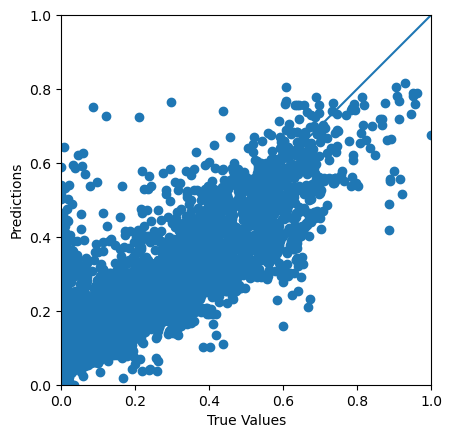

In [28]:
train_predictions = model3.predict(X_train)

a = plt.axes(aspect='equal')
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# k=8 for variable selection

In [29]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [30]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [31]:
#splitting data into train,validation and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [32]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor()


param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}


features = SelectKBest(mutual_info_regression,k=8)


grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(features.fit_transform(X_train, y_train), y_train)
best_params = grid.best_params_


knn = KNeighborsRegressor(**best_params)


k_best = features.fit_transform(X_train, y_train)
knn.fit(k_best, y_train)

y_pred = knn.predict(features.transform(X_test))


print(X.columns[features.get_support()])
features_knn=X[X.columns[features.get_support()]]
features_knn.head(2)


Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)',
       'is_Winter', 'is_Functioning_day', 'Month', 'int_date'],
      dtype='object')


,Hour,Temperature(C),Humidity(%),Solar Radiation (MJ/m2),is_Winter,is_Functioning_day,Month,int_date
0,0,-5.2,37,0.0,True,True,12.0,43068.0
1,1,-5.5,38,0.0,True,True,12.0,43068.0


In [33]:
df_2=df[['Hour', 'Temperature(C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)','is_Winter', 'is_Functioning_day', 'Month', 'int_date','Rented Bike Count']]

In [34]:
df_2.head()

,Hour,Temperature(C),Humidity(%),Solar Radiation (MJ/m2),is_Winter,is_Functioning_day,Month,int_date,Rented Bike Count
0,0,-5.2,37,0.0,True,True,12.0,43068.0,254
1,1,-5.5,38,0.0,True,True,12.0,43068.0,204
2,2,-6.0,39,0.0,True,True,12.0,43068.0,173
3,3,-6.2,40,0.0,True,True,12.0,43068.0,107
4,4,-6.0,36,0.0,True,True,12.0,43068.0,78


In [35]:
X = df_1.drop('Rented Bike Count',axis=1)
y = df_1['Rented Bike Count']

In [36]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [37]:
#splitting data into train,validation and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

# PART-2 BEST MODEL - RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestRegressor
best_model_feature5_2 = RandomForestRegressor(n_estimators= 300, max_features= 'log2', max_depth= 22,bootstrap=True)
best_model_feature5_2.fit(X_train,y_train)

RandomForestRegressor(max_depth=22, max_features='log2', n_estimators=300)

In [39]:
y_test_pred = best_model_feature5_2.predict(X_test)
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)
best_model_feature5_2.score(X_test, y_test)

MSE: 0.006761281588630693


0.7754608653062812

In [40]:
y_test_pred = best_model_feature5_2.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.006761281588630693
The mean absolute error is 0.048664295603593456
The root mean sqaured error is 0.08222701252405254


R^2 is 0.7754608653062812
RMSE is: 0.08222701252405254


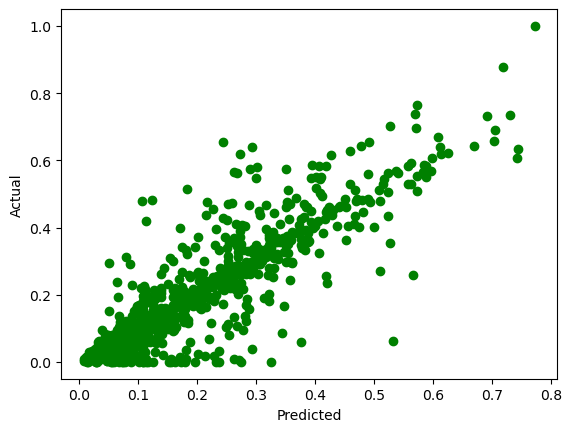

In [41]:
plt.scatter(y_test_pred,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {best_model_feature5_2.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

# PART-3 BEST MODEL - DEEP LEARNING

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y, test_size = 0.2, random_state = 1111)

In [43]:
def build_model3_five_hidden_layers():
    
    model = Sequential()

    model.add(Dense(128, input_shape = (X_train.shape[1],)))    
    
    model.add(Dense(128,Activation('relu')))                         
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         

    
    model.add(Dense(1))                        
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) 
    
    return model

model3 = build_model3_five_hidden_layers()

history = model3.fit(X_train, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.0212 - mae: 0.1017 - mse: 0.0212 - val_loss: 0.0157 - val_mae: 0.0897 - val_mse: 0.0157
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0178 - mae: 0.0907 - mse: 0.0178 - val_loss: 0.0164 - val_mae: 0.0858 - val_mse: 0.0164
Epoch 3/100
176/176 [==============================] - 0s 997us/step - loss: 0.0170 - mae: 0.0871 - mse: 0.0170 - val_loss: 0.0130 - val_mae: 0.0742 - val_mse: 0.0130
Epoch 4/100
176/176 [==============================] - 0s 984us/step - loss: 0.0162 - mae: 0.0843 - mse: 0.0162 - val_loss: 0.0135 - val_mae: 0.0784 - val_mse: 0.0135
Epoch 5/100
176/176 [==============================] - 0s 982us/step - loss: 0.0155 - mae: 0.0816 - mse: 0.0155 - val_loss: 0.0135 - val_mae: 0.0795 - val_mse: 0.0135
Epoch 6/100
176/176 [==============================] - 0s 982us/step - loss: 0.0150 - mae: 0.0804 - mse: 0.0150 - val_loss: 0.0133 - val_mae: 0.0744 - val_mse: 0.0133
Ep

Epoch 50/100
176/176 [==============================] - 0s 990us/step - loss: 0.0115 - mae: 0.0678 - mse: 0.0115 - val_loss: 0.0114 - val_mae: 0.0651 - val_mse: 0.0114
Epoch 51/100
176/176 [==============================] - 0s 980us/step - loss: 0.0115 - mae: 0.0677 - mse: 0.0115 - val_loss: 0.0103 - val_mae: 0.0649 - val_mse: 0.0103
Epoch 52/100
176/176 [==============================] - 0s 981us/step - loss: 0.0117 - mae: 0.0683 - mse: 0.0117 - val_loss: 0.0103 - val_mae: 0.0647 - val_mse: 0.0103
Epoch 53/100
176/176 [==============================] - 0s 978us/step - loss: 0.0115 - mae: 0.0681 - mse: 0.0115 - val_loss: 0.0119 - val_mae: 0.0740 - val_mse: 0.0119
Epoch 54/100
176/176 [==============================] - 0s 984us/step - loss: 0.0116 - mae: 0.0682 - mse: 0.0116 - val_loss: 0.0121 - val_mae: 0.0717 - val_mse: 0.0121
Epoch 55/100
176/176 [==============================] - 0s 979us/step - loss: 0.0116 - mae: 0.0679 - mse: 0.0116 - val_loss: 0.0123 - val_mae: 0.0736 - val_mse:

Epoch 99/100
176/176 [==============================] - 0s 984us/step - loss: 0.0110 - mae: 0.0654 - mse: 0.0110 - val_loss: 0.0102 - val_mae: 0.0644 - val_mse: 0.0102
Epoch 100/100
176/176 [==============================] - 0s 993us/step - loss: 0.0110 - mae: 0.0658 - mse: 0.0110 - val_loss: 0.0102 - val_mae: 0.0667 - val_mse: 0.0102


In [44]:
y_test_pred = model3.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

55/55 [==============================] - 0s 675us/step
The mean squared error is 0.011140186371953742
The mean absolute error is 0.06931134648656673
The root mean sqaured error is 0.10554708130476059


219/219 [==============================] - 0s 522us/step


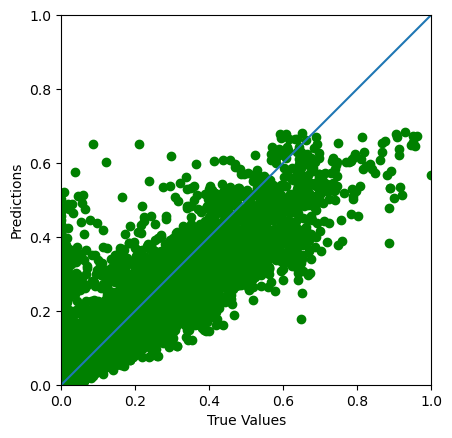

In [45]:
train_predictions = model3.predict(X_train)

a = plt.axes(aspect='equal')
plt.scatter(y_train, train_predictions,color='g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)